<h1 id="titulo" > Proyecto Bimestral CSV <h1/>
    <h3 id="subtitulo"> Nombre: Sebastián Rueda<h2/>
    <h3 id="subtitulo"> Fecha: 09-15-2020<h2/>
    <h3 id="subtitulo"> Curso: Python<h2/>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#cargar el csv
path = 'C://Users//jhoann.rueda//Desktop//Sebas//Universidad//Python//py-Rueda-Vanegas-Jhoann-Sebastian//Proyecto//Proyecto CSV//vgsales.csv'

df_general = pd.read_csv(
    path)
print(df_general)

        Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sport

<h3> En este proyecto se va a hacer una descripción sobre algunos de los datos analizados en el archivo CSV vgsales, que trata sobre los juegos mas vendidos para las diferentes consolas de videojuegos, por diferentes compañias y en un transcurso desde 1980 hasta el 2017<h4/>

<h2 id = "problema_uno">Ejercicio 1: Listar los 20 publishers con más ventas<h2/>

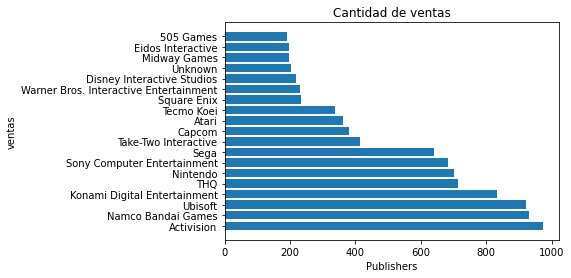

In [244]:
series_publishers_values = df_general['Publisher'].value_counts()


#Definimos una lista con paises como string
publisher = series_publishers_values.index[1:20]
#Definimos una lista con ventas como entero
ventas = series_publishers_values[1:20]
 
fig, ax = plt.subplots()
#Colocamos una etiqueta en el eje Y
ax.set_ylabel('ventas')
#Colocamos una etiqueta en el eje X
ax.set_xlabel('Publishers')
#Creamos la grafica de barras utilizando 'paises' como eje X y 'ventas' como eje y.
plt.barh(publisher, ventas)
plt.title('Cantidad de ventas')
#Finalmente mostramos la grafica con el metodo show()
plt.show()

<h2 id = "problema_dos">Ejercicio 2: Listar las plataformas y el numero de juegos que han sido diseñados para las mismas<h2/>

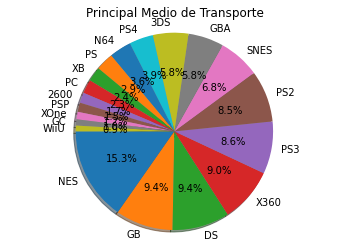

In [30]:
explode = []
series_plataformas_values = df_general['Platform'].value_counts()
plataformas = df_general['Platform'].unique()[1:20]
juegos = series_plataformas_values[1:20].values
#En este punto señalamos que posicion debe 'resaltarse' y el valor, si se coloca 0, se omite
for i in plataformas: 
    if i == 0:
        explode.append(0.1)
    else:
        explode.append(0)
 

fig1, ax1 = plt.subplots()
#Creamos el grafico, añadiendo los valores
ax1.pie(juegos, explode=explode, labels=plataformas, autopct='%1.1f%%',
        shadow=True, startangle=180)
#señalamos la forma, en este caso 'equal' es para dar forma circular
ax1.axis('equal')
plt.title("Principal Medio de Transporte")
plt.savefig('grafica_pastel.png')
plt.show()


<h2 id = "problema_tres">Ejercicio 3: Gráfico de los 10 años con mayores publicaciones de juegos<h2/>

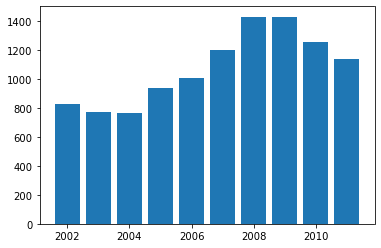

In [260]:
series_anios_juegos = df_general['Year'].value_counts()

serie = series_anios_juegos.head(10)
x = serie.index
y = serie

plt.bar(x, y)
plt.show()

<h2 id = "problema_cuatro">Ejercicio cuatro: Determinar los generos más populares para juegos<h2/>

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64


<ipython-input-8-44dd8968900e>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(x, y)


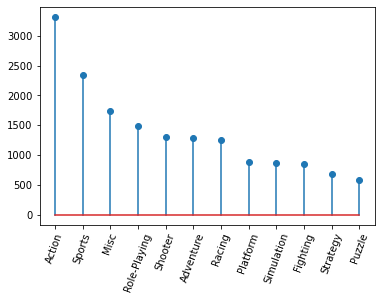

In [8]:
series_generos_juegos = df_general['Genre'].value_counts()

print(series_generos_juegos)
x = series_generos_juegos.index
y = series_generos_juegos
plt.stem(x, y)
degrees = 70
plt.xticks(rotation=degrees)
plt.show()

<h2 id = "problema_cinco">Ejercicio Cinco: Encontrar el Juego llamado Overwatch y hacer un analisis de la mejor plataforma que más ganacias tuvo<h2/>

False    16595
True         3
Name: Name, dtype: int64
[0.46, 0.37000000000000005, 0.04666666666666667] 1026     PS4
2444    XOne
4509      PC
Name: Platform, dtype: object


([<matplotlib.axis.XTick at 0x161ec898520>,
 [Text(0, 0, 'PS4'), Text(0, 0, 'XOne'), Text(0, 0, 'PC')])

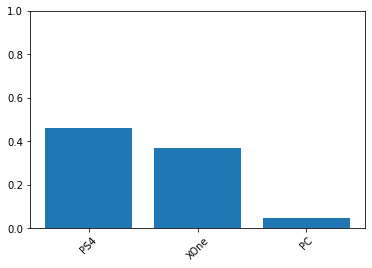

In [78]:
filter= df_general['Name'] == 'Overwatch'


print(filter.value_counts())
df_serie = df_general[filter]

promedio_ventas_NA = df_serie['NA_Sales'].mean()
promedio_ventas_EU = df_serie['EU_Sales'].mean()
promedio_ventas_JP = df_serie['JP_Sales'].mean()

x = [promedio_ventas_NA, promedio_ventas_EU, promedio_ventas_JP]
y = df_serie['Platform']
print(x,y)

plt.bar(np.arange(3),x)
plt.ylim(0,1)
plt.xticks(np.arange(3), y, rotation = 45)

<h2 id = "problema_seis">Ejercicio Seis: Encontrar los nombres de los juegos que tienen ventas mayores a 10 millones a Nivel Global desde el 2005 en adelante <h2/>

<ipython-input-50-d5e2d63c4eaa>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cumplen = df_general.loc[condicion_anio][condicion_NA]


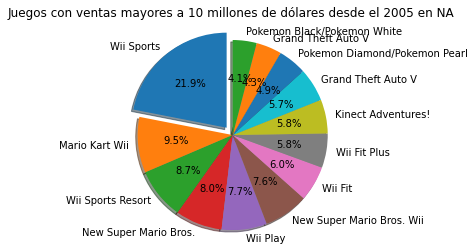

In [50]:
condicion_anio = df_general['Year'] > 2005
condicion_NA = df_general['Global_Sales'] > 15

cumplen = df_general.loc[condicion_anio][condicion_NA]
explode = []

for i in cumplen.index: 
    if i == 0:
        explode.append(0.1)
    else:
        explode.append(0)
 

fig1, ax1 = plt.subplots()
#Creamos el grafico, añadiendo los valores
ax1.pie(cumplen['Global_Sales'], explode=explode, labels=cumplen['Name'], autopct='%1.1f%%', 
        shadow=True, startangle=90)
#señalamos la forma, en este caso 'equal' es para dar forma circular
ax1.axis('equal')
plt.title("Juegos con ventas mayores a 10 millones de dólares desde el 2005 en NA")
plt.show()

<h2 id = "problema_siete">Ejercicio Siete: Nombre de los juegos que generaron menos ganancias, sacar el Top 5<h2/>

        Rank                                    Name Platform    Year  \
16597  16600                        Spirits & Spells      GBA  2003.0   
16188  16191                        Toro to Morimori      PS3  2009.0   
16187  16190                          Jewel Quest II       PC  2007.0   
16186  16189                             BattleForge       PC  2009.0   
16185  16188  Tantei Jinguuji Saburo: Hai to Diamond      PSP  2009.0   

           Genre                    Publisher  NA_Sales  EU_Sales  JP_Sales  \
16597   Platform                      Wanadoo      0.01      0.00      0.00   
16188       Misc  Sony Computer Entertainment      0.00      0.00      0.01   
16187     Puzzle                    Avanquest      0.00      0.01      0.00   
16186   Strategy              Electronic Arts      0.00      0.01      0.00   
16185  Adventure             Arc System Works      0.00      0.00      0.01   

       Other_Sales  Global_Sales  
16597          0.0          0.01  
16188          0

([<matplotlib.axis.XTick at 0x161e67428b0>,
 [Text(0, 0, 'Spirits & Spells'),
  Text(0, 0, 'Toro to Morimori'),
  Text(0, 0, 'Jewel Quest II'),
  Text(0, 0, 'BattleForge'),
  Text(0, 0, 'Tantei Jinguuji Saburo: Hai to Diamond')])

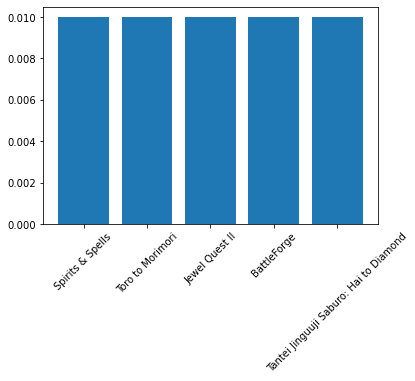

In [92]:
#sol Septimo
condicion = df_general.sort_values('Global_Sales', ascending = True)
condicion = condicion.head(5)

print(condicion)

fig,ax = plt.subplots()
print()
plt.bar(condicion['Name'],condicion['Global_Sales'])
plt.xticks(np.arange(5), y, rotation = 45)

<h2 id = "problema_ocho">Ejercicio Ocho: Hacer una comparación entre las ventas de NA y las ventas en EU de los registros del 20 al 40<h2/>

[Text(0, 0, 'Pokemon Diamond/Pokemon Pearl'),
 Text(0, 0, 'Super Mario Land'),
 Text(0, 0, 'Super Mario Bros. 3'),
 Text(0, 0, 'Grand Theft Auto V'),
 Text(0, 0, 'Grand Theft Auto: Vice City'),
 Text(0, 0, 'Pokemon Ruby/Pokemon Sapphire'),
 Text(0, 0, 'Pokemon Black/Pokemon White'),
 Text(0, 0, 'Brain Age 2: More Training in Minutes a Day'),
 Text(0, 0, 'Gran Turismo 3: A-Spec'),
 Text(0, 0, 'Call of Duty: Modern Warfare 3'),
 Text(0, 0, 'Pokémon Yellow: Special Pikachu Edition'),
 Text(0, 0, 'Call of Duty: Black Ops'),
 Text(0, 0, 'Pokemon X/Pokemon Y'),
 Text(0, 0, 'Call of Duty: Black Ops 3'),
 Text(0, 0, 'Call of Duty: Black Ops II'),
 Text(0, 0, 'Call of Duty: Black Ops II'),
 Text(0, 0, 'Call of Duty: Modern Warfare 2'),
 Text(0, 0, 'Call of Duty: Modern Warfare 3'),
 Text(0, 0, 'Grand Theft Auto III'),
 Text(0, 0, 'Super Smash Bros. Brawl')]

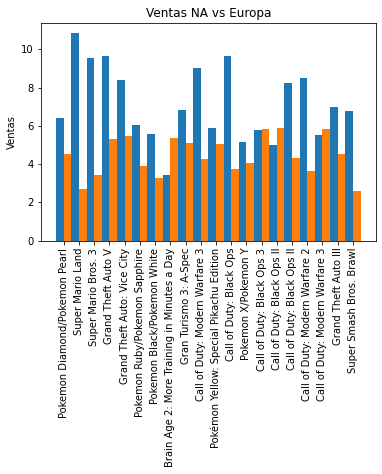

In [264]:
#Sol Octavo
df_NAyEU = pd.DataFrame(df_general, columns = ['Rank','Name','NA_Sales','EU_Sales'])[20:40]
x = np.arange(len(df_NAyEU['Name']))
#tamaño de cada barra
width = 0.5
 
fig, ax = plt.subplots()

#Generamos las barras para el conjunto de NA
rects1 = ax.bar(x - width/2, df_NAyEU['NA_Sales'], width, label='Norte A.')
#Generamos las barras para el conjunto de EU
rects2 = ax.bar(x + width/2, df_NAyEU['EU_Sales'], width, label='Europa')
 
#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('Ventas')
ax.set_title('Ventas NA vs Europa')
ax.set_xticks(x)
ax.set_xticklabels(df_NAyEU['Name'],rotation = 90)

<h2 id = "problema_nueve">Ejercicio Nueve: Hacer una comparación entre las ventas de Japón y las ventas en Europa de los registros del 20 al 40<h2/>

[Text(0, 0, 'Pokemon Diamond/Pokemon Pearl'),
 Text(0, 0, 'Super Mario Land'),
 Text(0, 0, 'Super Mario Bros. 3'),
 Text(0, 0, 'Grand Theft Auto V'),
 Text(0, 0, 'Grand Theft Auto: Vice City'),
 Text(0, 0, 'Pokemon Ruby/Pokemon Sapphire'),
 Text(0, 0, 'Pokemon Black/Pokemon White'),
 Text(0, 0, 'Brain Age 2: More Training in Minutes a Day'),
 Text(0, 0, 'Gran Turismo 3: A-Spec'),
 Text(0, 0, 'Call of Duty: Modern Warfare 3'),
 Text(0, 0, 'Pokémon Yellow: Special Pikachu Edition'),
 Text(0, 0, 'Call of Duty: Black Ops'),
 Text(0, 0, 'Pokemon X/Pokemon Y'),
 Text(0, 0, 'Call of Duty: Black Ops 3'),
 Text(0, 0, 'Call of Duty: Black Ops II'),
 Text(0, 0, 'Call of Duty: Black Ops II'),
 Text(0, 0, 'Call of Duty: Modern Warfare 2'),
 Text(0, 0, 'Call of Duty: Modern Warfare 3'),
 Text(0, 0, 'Grand Theft Auto III'),
 Text(0, 0, 'Super Smash Bros. Brawl')]

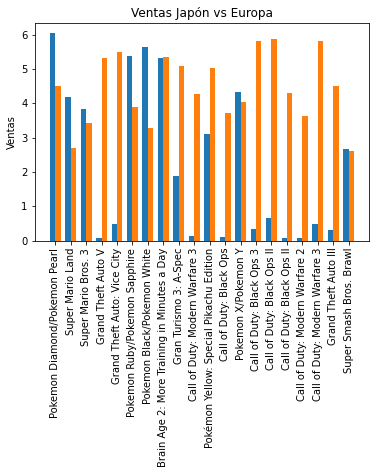

In [109]:
#sol Noveno
df_JPyEU = pd.DataFrame(df_general, columns = ['Rank','Name','JP_Sales','EU_Sales'])[20:40]

x = np.arange(len(df_JPyEU['Name']))
#tamaño de cada barra
width = 0.35
 
fig, ax = plt.subplots()
 
#Generamos las barras para el conjunto de hombres
rects1 = ax.bar(x - width/2, df_JPyEU['JP_Sales'], width, label='Norte A.')
#Generamos las barras para el conjunto de mujeres
rects2 = ax.bar(x + width/2, df_JPyEU['EU_Sales'], width, label='Europa')
 
#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('Ventas')
ax.set_title('Ventas Japón vs Europa')
ax.set_xticks(x)
ax.set_xticklabels(df_JPyEU['Name'],rotation = 90)

<h2 id = "problema_diez">Ejercicio Diez: Hacer una comparación entre las ventas de NA y las ventas en Japón de los registros del 20 al 40<h2/>

[Text(0, 0, 'Pokemon Diamond/Pokemon Pearl'),
 Text(0, 0, 'Super Mario Land'),
 Text(0, 0, 'Super Mario Bros. 3'),
 Text(0, 0, 'Grand Theft Auto V'),
 Text(0, 0, 'Grand Theft Auto: Vice City'),
 Text(0, 0, 'Pokemon Ruby/Pokemon Sapphire'),
 Text(0, 0, 'Pokemon Black/Pokemon White'),
 Text(0, 0, 'Brain Age 2: More Training in Minutes a Day'),
 Text(0, 0, 'Gran Turismo 3: A-Spec'),
 Text(0, 0, 'Call of Duty: Modern Warfare 3'),
 Text(0, 0, 'Pokémon Yellow: Special Pikachu Edition'),
 Text(0, 0, 'Call of Duty: Black Ops'),
 Text(0, 0, 'Pokemon X/Pokemon Y'),
 Text(0, 0, 'Call of Duty: Black Ops 3'),
 Text(0, 0, 'Call of Duty: Black Ops II'),
 Text(0, 0, 'Call of Duty: Black Ops II'),
 Text(0, 0, 'Call of Duty: Modern Warfare 2'),
 Text(0, 0, 'Call of Duty: Modern Warfare 3'),
 Text(0, 0, 'Grand Theft Auto III'),
 Text(0, 0, 'Super Smash Bros. Brawl')]

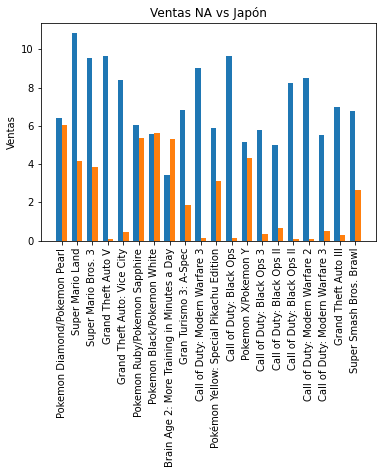

In [110]:
#sol Decimo

df_NAyJP = pd.DataFrame(df_general, columns = ['Rank','Name','NA_Sales','JP_Sales'])[20:40]
x = np.arange(len(df_NAyJP['Name']))
#tamaño de cada barra
width = 0.35
 
fig, ax = plt.subplots()
 
#Generamos las barras para el conjunto de hombres
rects1 = ax.bar(x - width/2, df_NAyJP['NA_Sales'], width, label='Norte A.')
#Generamos las barras para el conjunto de mujeres
rects2 = ax.bar(x + width/2, df_NAyJP['JP_Sales'], width, label='Japón')
 
#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('Ventas')
ax.set_title('Ventas NA vs Japón')
ax.set_xticks(x)
ax.set_xticklabels(df_NAyJP['Name'],rotation = 90)

<h2 id = "problema_siete">Ejercicio Once: Hacer una comparación de las ventas entre Norte América, Europa y Japónde los juegos en el rank 20 al 40<h2/>

[Text(0, 0, 'Pokemon Diamond/Pokemon Pearl'),
 Text(0, 0, 'Super Mario Land'),
 Text(0, 0, 'Super Mario Bros. 3'),
 Text(0, 0, 'Grand Theft Auto V'),
 Text(0, 0, 'Grand Theft Auto: Vice City'),
 Text(0, 0, 'Pokemon Ruby/Pokemon Sapphire'),
 Text(0, 0, 'Pokemon Black/Pokemon White'),
 Text(0, 0, 'Brain Age 2: More Training in Minutes a Day'),
 Text(0, 0, 'Gran Turismo 3: A-Spec'),
 Text(0, 0, 'Call of Duty: Modern Warfare 3'),
 Text(0, 0, 'Pokémon Yellow: Special Pikachu Edition'),
 Text(0, 0, 'Call of Duty: Black Ops'),
 Text(0, 0, 'Pokemon X/Pokemon Y'),
 Text(0, 0, 'Call of Duty: Black Ops 3'),
 Text(0, 0, 'Call of Duty: Black Ops II'),
 Text(0, 0, 'Call of Duty: Black Ops II'),
 Text(0, 0, 'Call of Duty: Modern Warfare 2'),
 Text(0, 0, 'Call of Duty: Modern Warfare 3'),
 Text(0, 0, 'Grand Theft Auto III'),
 Text(0, 0, 'Super Smash Bros. Brawl')]

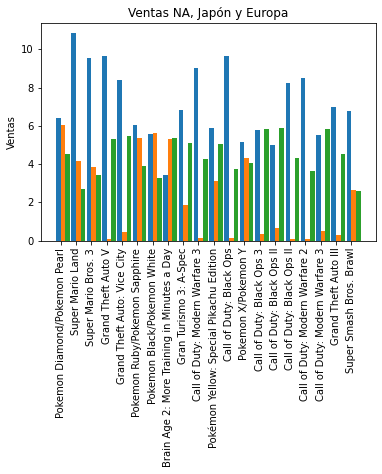

In [127]:
#sol once
df_NAJPEU = pd.DataFrame(df_general, columns = ['Rank','Name','NA_Sales','JP_Sales','EU_Sales'])[20:40]
x = np.arange(len(df_NAJPEU['Name']))
#tamaño de cada barra
width = 0.3
 
fig, ax = plt.subplots()
 
#Generamos las barras para el conjunto de Norte america
rects1 = ax.bar(x - width/2, df_NAJPEU['NA_Sales'], width, label='Norte A.')
#Generamos las barras para el conjunto de Japon
rects2 = ax.bar(x + width/2 , df_NAJPEU['JP_Sales'], width, label='Japón')
#Generamos las barras para el conjunto de Europa
rects2 = ax.bar(x + (3*width/2), df_NAJPEU['EU_Sales'], width, label='Europa')
 
#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('Ventas')
ax.set_title('Ventas NA, Japón y Europa')
ax.set_xticks(x)
ax.set_xticklabels(df_NAJPEU['Name'],rotation = 90)

<h2 id = "problema_siete">Ejericio Doce: Encontrar cual es el Genero más desarrollado por Nintendo<h2/>

Platform        112
Role-Playing    106
Misc            100
Action           79
Puzzle           74
Sports           55
Racing           37
Adventure        35
Strategy         32
Simulation       29
Shooter          26
Fighting         18
Name: Genre, dtype: int64


([<matplotlib.axis.XTick at 0x161f48de490>,
 [Text(0, 0, 'Platform'),
  Text(0, 0, 'Role-Playing'),
  Text(0, 0, 'Misc'),
  Text(0, 0, 'Action'),
  Text(0, 0, 'Puzzle'),
  Text(0, 0, 'Sports'),
  Text(0, 0, 'Racing'),
  Text(0, 0, 'Adventure'),
  Text(0, 0, 'Strategy'),
  Text(0, 0, 'Simulation'),
  Text(0, 0, 'Shooter'),
  Text(0, 0, 'Fighting')])

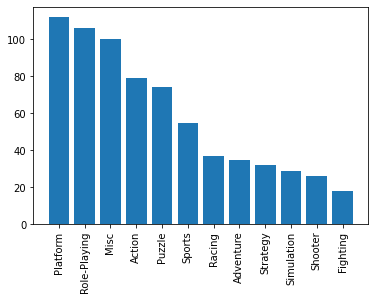

In [265]:
#sol Doce

df_nintendo = df_general[(df_general['Publisher'] == 'Nintendo')]
nombre = df_nintendo['Genre'].value_counts()

fig,ax = plt.subplots()
print(nombre)
plt.bar(nombre.index,nombre)
plt.xticks(np.arange(12), nombre.index, rotation = 90)

<h2 id = "problema_siete">Ejercicio Trece: Calcular cuanto dinero ganó Nintendo con todos los juegos de tipo platform<h2/>

Genre
Action          128.18
Adventure        35.71
Fighting         53.35
Misc            180.67
Platform        427.21
Puzzle          124.88
Racing          151.30
Role-Playing    284.90
Shooter          69.73
Simulation       85.27
Sports          218.01
Strategy         27.35
Name: Global_Sales, dtype: float64


([<matplotlib.axis.XTick at 0x161f494f430>,
 [Text(0, 0, 'Action'),
  Text(0, 0, 'Adventure'),
  Text(0, 0, 'Fighting'),
  Text(0, 0, 'Misc'),
  Text(0, 0, 'Platform'),
  Text(0, 0, 'Puzzle'),
  Text(0, 0, 'Racing'),
  Text(0, 0, 'Role-Playing'),
  Text(0, 0, 'Shooter'),
  Text(0, 0, 'Simulation'),
  Text(0, 0, 'Sports'),
  Text(0, 0, 'Strategy')])

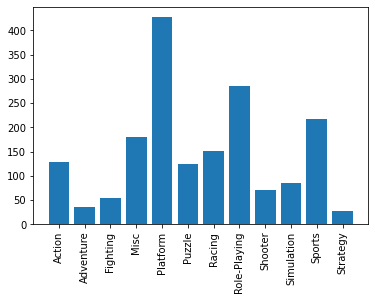

In [266]:
#sol trece

df_nintendo = df_general[(df_general['Publisher'] == 'Nintendo')]
genero = df_nintendo.groupby(['Genre'])['Global_Sales'].sum()

fig,ax = plt.subplots()
print(genero)
plt.bar(genero.index,genero)
plt.xticks(np.arange(12), genero.index, rotation = 90)

<h2 id = "problema_siete">Ejercicio Catorce: Listar todas los generos de juegos que ha producido Activisión<h2/>

Action          310
Shooter         159
Sports          144
Misc            103
Racing           74
Platform         60
Role-Playing     41
Adventure        25
Simulation       23
Strategy         22
Fighting          7
Puzzle            7
Name: Genre, dtype: int64


([<matplotlib.axis.XTick at 0x161f49bd6d0>,
 [Text(0, 0, 'Action'),
  Text(0, 0, 'Shooter'),
  Text(0, 0, 'Sports'),
  Text(0, 0, 'Misc'),
  Text(0, 0, 'Racing'),
  Text(0, 0, 'Platform'),
  Text(0, 0, 'Role-Playing'),
  Text(0, 0, 'Adventure'),
  Text(0, 0, 'Simulation'),
  Text(0, 0, 'Strategy'),
  Text(0, 0, 'Fighting'),
  Text(0, 0, 'Puzzle')])

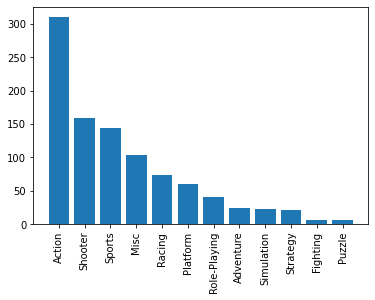

In [267]:
#sol Catorse
df_nintendo = df_general[(df_general['Publisher'] == 'Activision')]
nombre = df_nintendo['Genre'].value_counts()

fig,ax = plt.subplots()
print(nombre)
plt.bar(nombre.index,nombre)
plt.xticks(np.arange(12), nombre.index, rotation = 90)

<h2 id = "problema_siete">Ejercicio Quince: Calcular la cantidad de dinero que se ganó según el genero producido por Activisión<h2/>

Genre
Action          142.33
Adventure         5.42
Fighting          2.86
Misc             76.55
Platform         33.40
Puzzle            1.06
Racing           17.31
Role-Playing     46.79
Shooter         299.87
Simulation        8.26
Sports           75.91
Strategy         17.70
Name: Global_Sales, dtype: float64


([<matplotlib.axis.XTick at 0x161f4a2f340>,
 [Text(0, 0, 'Action'),
  Text(0, 0, 'Adventure'),
  Text(0, 0, 'Fighting'),
  Text(0, 0, 'Misc'),
  Text(0, 0, 'Platform'),
  Text(0, 0, 'Puzzle'),
  Text(0, 0, 'Racing'),
  Text(0, 0, 'Role-Playing'),
  Text(0, 0, 'Shooter'),
  Text(0, 0, 'Simulation'),
  Text(0, 0, 'Sports'),
  Text(0, 0, 'Strategy')])

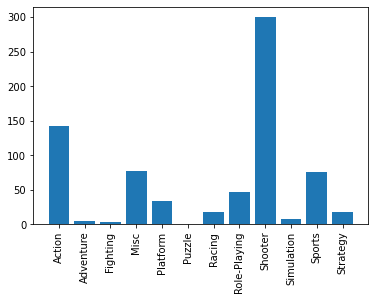

In [268]:
#sol Quince
df_nintendo = df_general[(df_general['Publisher'] == 'Activision')]
genero = df_nintendo.groupby(['Genre'])['Global_Sales'].sum()


fig,ax = plt.subplots()
print(genero)
plt.bar(genero.index,genero)
plt.xticks(np.arange(12), genero.index, rotation = 90)

<h2 id = "problema_siete">Ejercicio Diesiseis: Hacer una comparación entre los Publishers que más desarrollaron juegos del genero Racing (Tomar los 50 primeros Registros)<h2/>

([<matplotlib.axis.XTick at 0x161f63650a0>,
 <a list of 9 Text major ticklabel objects>)

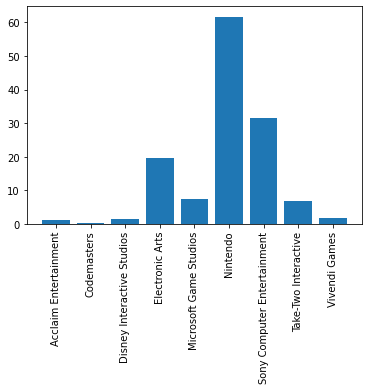

In [311]:
#sol diesiseis
df_nintendo = df_general[(df_general['Genre'] == 'Racing')][0:50]
year = df_nintendo.groupby(['Publisher'])['NA_Sales'].sum()

fig,ax = plt.subplots()
plt.bar(year.index,year)
plt.xticks(year.index, rotation = 90)

<h2 id = "problema_siete">Ejercicio Diesiete: Encontrar a los Publishers que han desarrollado más juegos para PC<h2/>

([<matplotlib.axis.XTick at 0x161f64fa760>,
 <a list of 12 Text major ticklabel objects>)

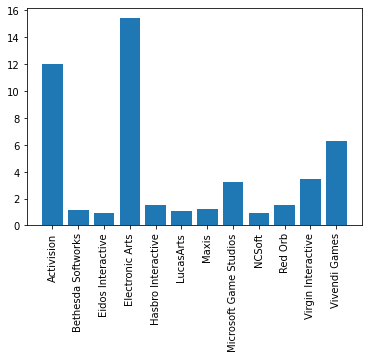

In [313]:
#sol diesiseite
df_nintendo = df_general[(df_general['Platform'] == 'PC')][0:30]
year = df_nintendo.groupby(['Publisher'])['NA_Sales'].sum()

fig,ax = plt.subplots()
plt.bar(year.index,year)
plt.xticks(year.index, rotation = 90)

<h2 id = "problema_siete">Ejercicio Diesiocho: Listar todas los generos de juegos que ha producido Ubisoft<h2/>

Action          193
Misc            151
Simulation      119
Shooter          92
Sports           72
Platform         70
Adventure        59
Racing           52
Role-Playing     41
Strategy         29
Puzzle           24
Fighting         19
Name: Genre, dtype: int64


([<matplotlib.axis.XTick at 0x161f35c09d0>,
 [Text(0, 0, 'Action'),
  Text(0, 0, 'Misc'),
  Text(0, 0, 'Simulation'),
  Text(0, 0, 'Shooter'),
  Text(0, 0, 'Sports'),
  Text(0, 0, 'Platform'),
  Text(0, 0, 'Adventure'),
  Text(0, 0, 'Racing'),
  Text(0, 0, 'Role-Playing'),
  Text(0, 0, 'Strategy'),
  Text(0, 0, 'Puzzle'),
  Text(0, 0, 'Fighting')])

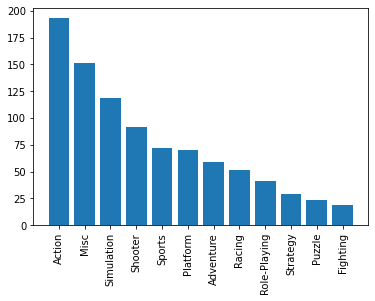

In [211]:
#diesiocho
#sol Catorse
df_nintendo = df_general[(df_general['Publisher'] == 'Ubisoft')]
nombre = df_nintendo['Genre'].value_counts()

fig,ax = plt.subplots()
print(nombre)
plt.bar(nombre.index,nombre)
plt.xticks(np.arange(12), nombre.index, rotation = 90)

<h2 id = "problema_siete">Ejercicio Diesinueve: Buscar todos los generos creados por Ubisoft y hacer un análisis de las ventas que han producidos según el género<h2/>

Genre
Action          142.94
Adventure        22.19
Fighting          7.07
Misc             97.53
Platform         21.06
Puzzle            6.33
Racing           15.83
Role-Playing     16.76
Shooter          67.65
Simulation       44.67
Sports           24.24
Strategy          8.45
Name: Global_Sales, dtype: float64


([<matplotlib.axis.XTick at 0x161f3555b80>,
 [Text(0, 0, 'Action'),
  Text(0, 0, 'Adventure'),
  Text(0, 0, 'Fighting'),
  Text(0, 0, 'Misc'),
  Text(0, 0, 'Platform'),
  Text(0, 0, 'Puzzle'),
  Text(0, 0, 'Racing'),
  Text(0, 0, 'Role-Playing'),
  Text(0, 0, 'Shooter'),
  Text(0, 0, 'Simulation'),
  Text(0, 0, 'Sports'),
  Text(0, 0, 'Strategy')])

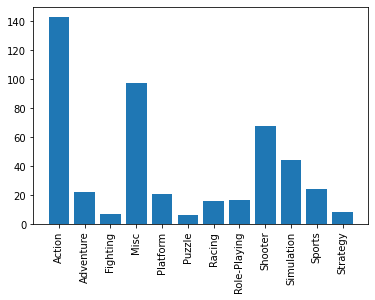

In [210]:
#diesinueve
df_nintendo = df_general[(df_general['Publisher'] == 'Ubisoft')]
genero = df_nintendo.groupby(['Genre'])['Global_Sales'].sum()


fig,ax = plt.subplots()
print(genero)
plt.bar(genero.index,genero)
plt.xticks(np.arange(12), genero.index, rotation = 90)

<h2 id = "problema_siete">Ejercicio Veinte: Hacer el calculo del dinero ganado por año en otros paises con el el Genero Misc<h2/>

Year
1980.0     0.02
1982.0     0.01
1983.0     0.00
1984.0     0.00
1989.0     0.00
1991.0     0.00
1992.0     0.12
1993.0     0.00
1994.0     0.10
1995.0     0.09
1996.0     0.36
1997.0     0.20
1998.0     0.58
1999.0     0.68
2000.0     0.73
2001.0     0.92
2002.0     0.68
2003.0     2.04
2004.0     2.14
2005.0     6.05
2006.0     6.09
2007.0    11.95
2008.0    11.00
2009.0     9.36
2010.0     8.12
2011.0     4.94
2012.0     1.65
2013.0     2.05
2014.0     3.07
2015.0     1.04
2016.0     0.03
Name: Other_Sales, dtype: float64


([<matplotlib.axis.XTick at 0x161f1b68880>,
 <a list of 31 Text major ticklabel objects>)

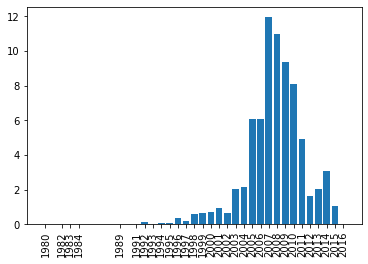

In [243]:
#Veinte
df_nintendo = df_general[(df_general['Genre'] == 'Misc')]
year = df_nintendo.groupby(['Year'])['Other_Sales'].sum()

print(year)
fig,ax = plt.subplots()
plt.bar(year.index,year)
plt.xticks(year.index, rotation = 90)